In [241]:
import numpy as np 
import pandas as pd 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples,silhouette_score
import matplotlib.pyplot as plt 
from mpl_toolkits import mplot3d

%matplotlib inline
pd.set_option('display.max_columns', 500)

## Loading the data

In [172]:
dropout = pd.read_excel(r"C:/Users/ADMIN/Documents/Codebase/Data-science-projects/Education/data/dropout.xls")
enrollments = pd.read_excel(r"C:/Users/ADMIN/Documents/Codebase/Data-science-projects/Education/data/enrollment.xls")
drinks = pd.read_excel(r"C:/Users/ADMIN/Documents/Codebase/Data-science-projects/Education/data/drinking_water.xls")
computers = pd.read_excel(r"C:/Users/ADMIN/Documents/Codebase/Data-science-projects/Education/data/computers.xls")
electricity = pd.read_excel(r"C:/Users/ADMIN/Documents/Codebase/Data-science-projects/Education/data/electricity.xls")
boys_toilet = pd.read_excel(r"C:/Users/ADMIN/Documents/Codebase/Data-science-projects/Education/data/boys_toilet.xls")
girls_toilet = pd.read_excel(r"C:/Users/ADMIN/Documents/Codebase/Data-science-projects/Education/data/girls_toilet.xls")

## Data preparation

In [152]:
def returner(xx):
    x=[]
    for i in range(36):
        x.append(xx[['State','All Schools']].loc[3*i])  
    x=pd.DataFrame(x)
    x.set_index('State', inplace=True)
    return x

In [153]:
enrollments['Higher_Secondary_Boys']=enrollments['Higher_Secondary_Boys'].astype('float')
enrollments['Higher_Secondary_Girls']=enrollments['Higher_Secondary_Girls'].astype('int')
enrollments['Higher_Secondary_Total']=enrollments['Higher_Secondary_Total'].astype('int')   
drinks=returner(drinks)
drinks.columns=['Drinking water']
electricity=returner(electricity)
electricity.columns=['Electricity']
computers=returner(computers)
computers.columns=["Computer"]
boys_t=returner(boys_toilet)
boys_t.columns=['Boys toilet']
girls_t=returner(girls_toilet)
girls_t.columns=['Girls toilet']
factors=pd.concat([drinks,electricity,computers,boys_t,girls_t],axis=1)
factors.reset_index(inplace=True)
col={1:'blue',2:'orange',3:'green',4:'red',5:'purple',6:'brown',7:'pink',8:'olive',0:'cyan'}
clusters['color']=clusters.Labels.map(col)

In [154]:
def create_aggregate(inp):

    states=[]
    for i in range(36):
        states.append(inp.State.iloc[3*i])
    states=pd.DataFrame(states, columns=['State'])
    inp.drop(['State','Year'],axis=1,inplace=True)

    x=pd.DataFrame()
    for i in range(36):
        x[i]=inp.iloc[3*i+0:i*3+3,:].mean()
    x=x.transpose() 
    return x

## Data exploration

In [200]:
print("\n Correlation between enrollment rates at different stages of schooling\n")
enrollments[['Primary_Total', 'Upper_Primary_Total', 'Secondary_Total','Higher_Secondary_Total']].corr(method='spearman').style.background_gradient(cmap='coolwarm')


 Correlation between enrollment rates at different stages of schooling



,Primary_Total,Upper_Primary_Total,Secondary_Total,Higher_Secondary_Total
Primary_Total,1.000000,0.683610,0.126335,-0.211083
Upper_Primary_Total,0.683610,1.000000,0.517724,0.079576
Secondary_Total,0.126335,0.517724,1.000000,0.661039
Higher_Secondary_Total,-0.211083,0.079576,0.661039,1.000000


In [197]:
print("\n Correlation between dropout rates at different stages of schooling\n")
dropout[['PRIMARY_TOTAL', 'UPPER_PRIMARY_TOTAL', 'SECONDARY_TOTAL','HRSECONDARY_TOTAL']].corr(method='spearman').style.background_gradient(cmap='coolwarm')


 Correlation between dropout rates at different stages of schooling



,PRIMARY_TOTAL,UPPER_PRIMARY_TOTAL,SECONDARY_TOTAL,HRSECONDARY_TOTAL
PRIMARY_TOTAL,1.000000,0.812230,0.434245,-0.322448
UPPER_PRIMARY_TOTAL,0.812230,1.000000,0.680051,-0.263748
SECONDARY_TOTAL,0.434245,0.680051,1.000000,-0.320541
HRSECONDARY_TOTAL,-0.322448,-0.263748,-0.320541,1.000000


In [199]:
factors.corr(method='spearman').style.background_gradient(cmap="coolwarm")

,Drinking water,Electricity,Computer,Boys toilet,Girls toilet
Drinking water,1.000000,0.865238,0.748390,0.696139,0.636747
Electricity,0.865238,1.000000,0.878351,0.642424,0.704691
Computer,0.748390,0.878351,1.000000,0.648551,0.690509
Boys toilet,0.696139,0.642424,0.648551,1.000000,0.874460
Girls toilet,0.636747,0.704691,0.690509,0.874460,1.000000


## Clustering

In [159]:
def create_clusters(inx, groupon):

    scores=[]
    for i in range(4,36):
        k=KMeans(n_clusters=i,n_init=500, max_iter=500)
        k.fit(inx[groupon])
        label=KMeans.predict(k,inx[groupon])
        scores.append(silhouette_score(inx, label))

    pd.DataFrame(scores).plot()
    best_cluster_no=np.argmax(scores[2:36])+2
    plt.axvline(best_cluster_no)
    plt.text(best_cluster_no, 0.34,s=f"Max silhoutte score at n={best_cluster_no}")
    plt.xlabel("No. of clusters")
    plt.ylabel("Silhoutte score")
    kk=KMeans(n_clusters=best_cluster_no)

    kk.fit(inx[groupon])
    lab = pd.DataFrame(kk.labels_,columns=['Labels'])
    result=pd.concat([states['State'],inx,lab['Labels']],axis=1)
    return result

In [160]:
def return_clusters(result):
    grouping=result[['State','Labels']]
    clusters=pd.DataFrame()
    for l in grouping.Labels.unique():
        clusters=pd.concat([clusters,pd.Series(np.array(grouping.State[grouping.Labels==l]), name=f"Cluster {l}").to_frame()],axis=1)
    clusters.replace({np.nan:'-'},inplace=True)
    clusters.sort_index(axis=1, inplace=True)    
    return clusters

## Dropouts

,Cluster 0,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5
0,Chhattisgarh,A & N Islands,Andhra Pradesh,Bihar,Assam,Arunachal Pradesh
1,Dadra & Nagar Haveli,Chandigarh,Haryana,Karnataka,Jharkhand,Manipur
2,Daman & Diu,Delhi,Himachal Pradesh,Odisha,Madhya Pradesh,Nagaland
3,Gujarat,Goa,Kerala,-,Meghalaya,-
4,Jammu & Kashmir,-,Lakshadweep,-,Mizoram,-
5,Sikkim,-,Maharashtra,-,-,-
6,Telangana,-,Puducherry,-,-,-
7,Tripura,-,Punjab,-,-,-
8,West Bengal,-,Rajasthan,-,-,-
9,-,-,Tamil Nadu,-,-,-


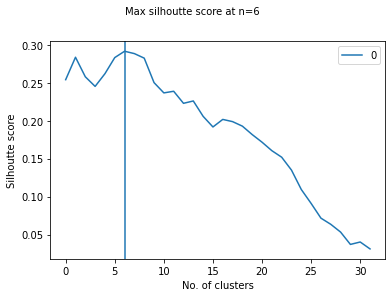

In [161]:
dropouts_x = create_aggregate(dropout)
dropouts_result=create_clusters(dropouts_x,['PRIMARY_TOTAL', 'UPPER_PRIMARY_TOTAL', 'SECONDARY_TOTAL','HRSECONDARY_TOTAL'])
dropouts_clusters=return_clusters(dropouts_result)

In [ ]:
dropouts_clusters

In [162]:
reqd=dropouts_result.groupby('Labels')[dropouts_result.columns[1:-1]].agg('mean')
reqd.style.background_gradient(cmap='OrRd')

,PRIMARY_BOYS,PRIMARY_GIRLS,PRIMARY_TOTAL,UPPER_PRIMARY_BOYS,UPPER_PRIMARY_GIRLS,UPPER_PRIMARY_TOTAL,SECONDARY_BOYS,SECONDARY_GIRLS,SECONDARY_TOTAL,HRSECONDARY_BOYS,HRSECONDARY_GIRLS,HRSECONDARY_TOTAL
Labels,,,,,,,,,,,,
0,3.168148,2.692593,2.931481,3.807778,4.100370,3.820370,18.978148,18.256296,18.658519,9.241481,6.854444,7.995926
1,0.280000,0.295833,0.277500,1.140833,0.950833,0.721667,7.610833,5.122500,6.445833,17.629167,9.943333,14.082500
2,2.575000,2.550556,2.561667,1.906111,2.535833,2.049167,12.253056,10.674444,11.482222,4.198889,3.453333,3.797778
3,2.216667,1.985556,2.084444,3.525556,3.204444,3.210000,33.901111,33.630000,33.771111,2.826667,1.251111,1.921111
4,10.237333,9.509333,9.872667,8.302667,8.688000,8.490667,22.805333,23.636667,23.205333,1.842667,1.594667,1.586667
5,12.031111,11.621111,11.831111,7.586667,8.553333,8.073333,17.852222,18.188889,18.035556,11.048889,9.136667,10.131111


## Enrollments

,Cluster 0,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5,Cluster 6
0,A & N Islands,Andhra Pradesh,Assam,Arunachal Pradesh,Himachal Pradesh,Chhattisgarh,Delhi
1,Chandigarh,Daman & Diu,Bihar,Manipur,Lakshadweep,Dadra & Nagar Haveli,Mizoram
2,Goa,Jammu & Kashmir,Gujarat,Meghalaya,-,Telangana,Sikkim
3,Haryana,Rajasthan,Jharkhand,-,-,Tripura,-
4,Kerala,Uttar Pradesh,Karnataka,-,-,-,-
5,Maharashtra,-,Madhya Pradesh,-,-,-,-
6,Puducherry,-,Nagaland,-,-,-,-
7,Punjab,-,Odisha,-,-,-,-
8,Tamil Nadu,-,West Bengal,-,-,-,-
9,Uttarakhand,-,-,-,-,-,-


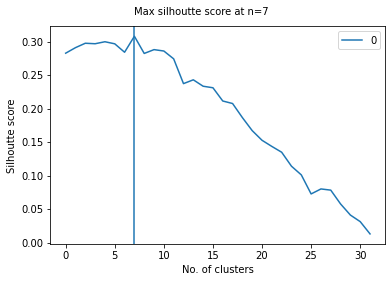

In [163]:
enrollments_x = create_aggregate(enrollments)
enrollments_result=create_clusters(enrollments_x,['Primary_Total', 'Upper_Primary_Total', 'Secondary_Total','Higher_Secondary_Total'])
enrollments_clusters=return_clusters(enrollments_result)

In [ ]:
enrollments_clusters

In [164]:
reqd=dropouts_result.groupby('Labels')[dropouts_result.columns[1:-1]].agg('mean')
reqd.style.background_gradient(cmap='YlGn')

,PRIMARY_BOYS,PRIMARY_GIRLS,PRIMARY_TOTAL,UPPER_PRIMARY_BOYS,UPPER_PRIMARY_GIRLS,UPPER_PRIMARY_TOTAL,SECONDARY_BOYS,SECONDARY_GIRLS,SECONDARY_TOTAL,HRSECONDARY_BOYS,HRSECONDARY_GIRLS,HRSECONDARY_TOTAL
Labels,,,,,,,,,,,,
0,3.168148,2.692593,2.931481,3.807778,4.100370,3.820370,18.978148,18.256296,18.658519,9.241481,6.854444,7.995926
1,0.280000,0.295833,0.277500,1.140833,0.950833,0.721667,7.610833,5.122500,6.445833,17.629167,9.943333,14.082500
2,2.575000,2.550556,2.561667,1.906111,2.535833,2.049167,12.253056,10.674444,11.482222,4.198889,3.453333,3.797778
3,2.216667,1.985556,2.084444,3.525556,3.204444,3.210000,33.901111,33.630000,33.771111,2.826667,1.251111,1.921111
4,10.237333,9.509333,9.872667,8.302667,8.688000,8.490667,22.805333,23.636667,23.205333,1.842667,1.594667,1.586667
5,12.031111,11.621111,11.831111,7.586667,8.553333,8.073333,17.852222,18.188889,18.035556,11.048889,9.136667,10.131111


## Other factors

,Cluster 0,Cluster 1,Cluster 2
0,A & N Islands,Arunachal Pradesh,Chandigarh
1,Andhra Pradesh,Assam,Delhi
2,Dadra & Nagar Haveli,Bihar,Gujarat
3,Daman & Diu,Chhattisgarh,Kerala
4,Goa,Jammu & Kashmir,Lakshadweep
5,Haryana,Jharkhand,Puducherry
6,Himachal Pradesh,Madhya Pradesh,-
7,Karnataka,Manipur,-
8,Maharashtra,Meghalaya,-
9,Mizoram,Nagaland,-


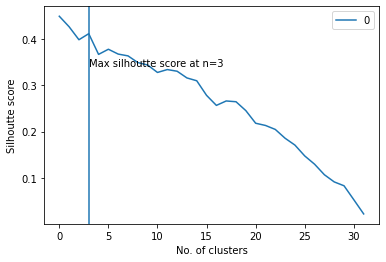

In [165]:
factors_result=create_clusters(factors.drop(['State'],axis=1),['Drinking water', 'Electricity', 'Computer', 'Boys toilet',
       'Girls toilet'])
factors_clusters=return_clusters(factors_result)

In [ ]:
reqd=factors_result.groupby('Labels')[factors_result.columns[1:-1]].agg('mean')
reqd.style.background_gradient(cmap='GnBu')

## Analysis

In [175]:
dropouts_result=dropouts_result[['State','PRIMARY_TOTAL', 'UPPER_PRIMARY_TOTAL', 'SECONDARY_TOTAL','HRSECONDARY_TOTAL']]
dropouts_result.set_index(['State'],inplace=True)

In [176]:
enrollments_result=enrollments_result[['State','Primary_Total', 'Upper_Primary_Total', 'Secondary_Total','Higher_Secondary_Total']]
enrollments_result.set_index(['State'],inplace=True)

In [178]:
factors_result.set_index(['State'],inplace=True)

In [183]:
dataset=pd.concat([dropouts_result,enrollments_result,factors_result.drop(['Labels'],axis=1)],axis=1)
cols=[]
for col in dataset.columns[:4]:
    cols.append("Dropout-"+col[:-6])
for col in dataset.columns[4:8]:
    cols.append("Enrollments-"+col[:-6])
for col in dataset.columns[8:]:
    cols.append(col)  
dataset.columns=cols

In [185]:
dataset.head(5)

,Dropout-PRIMARY,Dropout-UPPER_PRIMARY,Dropout-SECONDARY,Dropout-HRSECONDARY,Enrollments-Primary,Enrollments-Upper_Primary,Enrollments-Secondary,Enrollments-Higher_Secondary,Drinking water,Electricity,Computer,Boys toilet,Girls toilet
State,,,,,,,,,,,,,
A & N Islands,0.800000,1.143333,7.543333,15.646667,91.260000,87.863333,93.243333,90.000000,98.69,88.86,53.06,94.52,93.44
Andhra Pradesh,4.750000,4.113333,13.693333,4.046667,89.810000,81.456667,74.370000,57.000000,90.35,90.34,29.57,56.88,81.31
Arunachal Pradesh,12.290000,6.590000,14.843333,13.533333,127.783333,122.200000,89.300000,64.666667,79.79,36.35,24.28,48.73,76.90
Assam,9.680000,8.253333,28.086667,3.976667,111.500000,94.013333,74.526667,34.333333,80.30,19.39,8.85,60.17,75.28
Bihar,0.696667,2.353333,27.123333,0.000000,102.240000,97.733333,69.180000,29.666667,92.53,9.96,5.47,73.42,75.41


In [201]:
dataset.corr(method='spearman').style.background_gradient(cmap='coolwarm')

,Dropout-PRIMARY,Dropout-UPPER_PRIMARY,Dropout-SECONDARY,Dropout-HRSECONDARY,Enrollments-Primary,Enrollments-Upper_Primary,Enrollments-Secondary,Enrollments-Higher_Secondary,Drinking water,Electricity,Computer,Boys toilet,Girls toilet
Dropout-PRIMARY,1.000000,0.812230,0.434245,-0.322448,0.549984,0.147795,-0.350048,-0.430586,-0.801090,-0.725750,-0.621564,-0.540805,-0.438378
Dropout-UPPER_PRIMARY,0.812230,1.000000,0.680051,-0.263748,0.488031,0.161647,-0.469755,-0.649244,-0.643249,-0.594073,-0.546718,-0.593432,-0.481346
Dropout-SECONDARY,0.434245,0.680051,1.000000,-0.320541,0.303732,0.019048,-0.541828,-0.946122,-0.448208,-0.545104,-0.555985,-0.459111,-0.410465
Dropout-HRSECONDARY,-0.322448,-0.263748,-0.320541,1.000000,-0.142563,0.082164,0.247907,0.286828,0.260050,0.466538,0.518738,0.249613,0.322265
Enrollments-Primary,0.549984,0.488031,0.303732,-0.142563,1.000000,0.727413,0.093694,-0.209076,-0.586416,-0.481959,-0.426512,-0.408371,-0.275276
Enrollments-Upper_Primary,0.147795,0.161647,0.019048,0.082164,0.727413,1.000000,0.468983,0.077889,-0.286749,-0.146650,-0.122265,-0.150676,0.040595
Enrollments-Secondary,-0.350048,-0.469755,-0.541828,0.247907,0.093694,0.468983,1.000000,0.689926,0.328083,0.456959,0.459202,0.260399,0.431600
Enrollments-Higher_Secondary,-0.430586,-0.649244,-0.946122,0.286828,-0.209076,0.077889,0.689926,1.000000,0.442021,0.524396,0.553717,0.373720,0.382429
Drinking water,-0.801090,-0.643249,-0.448208,0.260050,-0.586416,-0.286749,0.328083,0.442021,1.000000,0.865238,0.748390,0.696139,0.636747
Electricity,-0.725750,-0.594073,-0.545104,0.466538,-0.481959,-0.146650,0.456959,0.524396,0.865238,1.000000,0.878351,0.642424,0.704691


## Checking feature importance

In [238]:
from sklearn.decomposition import TruncatedSVD
tc= TruncatedSVD(n_components=12)
tc.fit(dataset)
feature_imp = pd.Series(dict(zip(dataset.columns,tc.explained_variance_)))
feature_imp.index.name="Feature"
feature_imp.name="Explained variance"
var_exp=pd.DataFrame(feature_imp)
tot=var_exp['Explained variance'].sum()
var_exp['Explained variance'] = var_exp['Explained variance']/tot*100
var_exp.sort_values(['Explained variance'],ascending=False,inplace=True)

exp_var=[]
for i in range(1,var_exp.shape[0]+1):
    exp_var.append(var_exp['Explained variance'].iloc[0:i].sum())
pd.DataFrame(exp_var,index=var_exp.index, columns=['Cumulative explained variance'])

,Cumulative explained variance
Feature,
Dropout-UPPER_PRIMARY,48.609597
Dropout-PRIMARY,70.089796
Dropout-SECONDARY,80.165989
Dropout-HRSECONDARY,87.297249
Enrollments-Primary,93.991659
Enrollments-Upper_Primary,96.023260
Enrollments-Secondary,97.704013
Enrollments-Higher_Secondary,98.513501
Drinking water,99.231118


## We can see the top 3 features explain 80% of the variance in the data

In [254]:
clusterset=dataset[['Dropout-PRIMARY', 'Dropout-UPPER_PRIMARY', 'Dropout-SECONDARY']].reset_index()

## Clustering on the basis of these three features

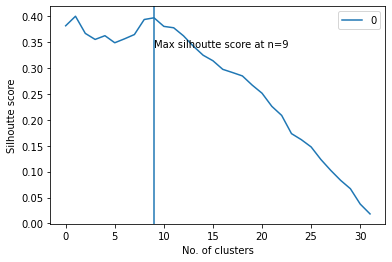

In [255]:
clusters=create_clusters(clusterset.drop(['State'],axis=1),list(clusterset.columns[1:]))

In [289]:
reqd=clusters.groupby('Labels')[clusters.columns[1:-1]].agg('mean')
reqd.style.background_gradient(cmap='GnBu')

,Dropout-PRIMARY,Dropout-UPPER_PRIMARY,Dropout-SECONDARY,Labels
Labels,,,,
0,5.224667,3.908667,16.076000,0
1,1.731333,4.034667,20.774000,1
2,0.000000,0.540000,0.000000,2
3,2.482381,1.717619,12.400000,3
4,3.120000,3.473333,42.966667,4
5,10.010000,9.053889,23.773889,5
6,0.868095,1.368571,8.635238,6
7,12.398333,6.175000,13.745000,7
8,1.566667,3.078333,29.173333,8


In [290]:
import plotly.express as px

fig = px.scatter_3d(clusters, y='Dropout-PRIMARY', z='Dropout-UPPER_PRIMARY', x='Dropout-SECONDARY', opacity=0.7, color='color',symbol='Labels',text='State')

fig.update_layout(width=1200, height=720)